In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('/content/train_csv.csv')

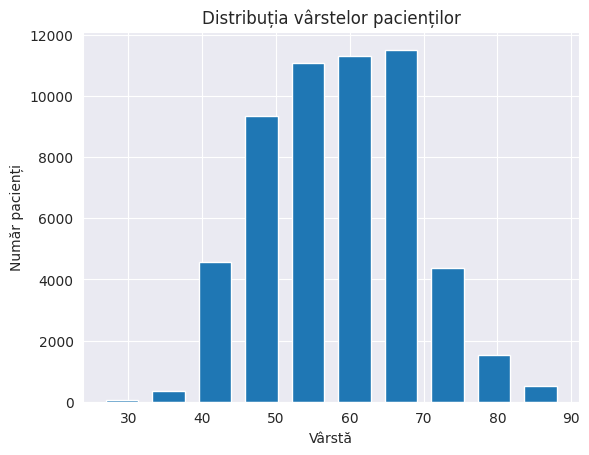

In [ ]:
# Histogram for 'age'
df['age'].plot(kind='hist', rwidth=0.7)
plt.title('Distribuția vârstelor pacienților')
plt.xlabel('Vârstă')
plt.ylabel('Număr pacienți')
plt.show()

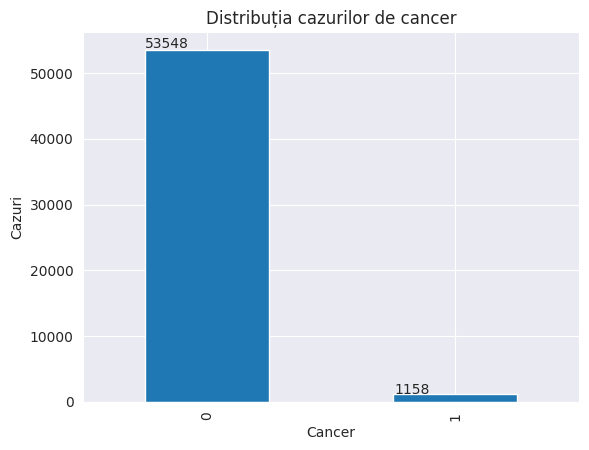

In [ ]:
# Bar graph for 'cancer'
ax = df['cancer'].value_counts().plot(kind='bar')
plt.title('Distribuția cazurilor de cancer')
plt.xlabel('Cancer')
plt.ylabel('Cazuri')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

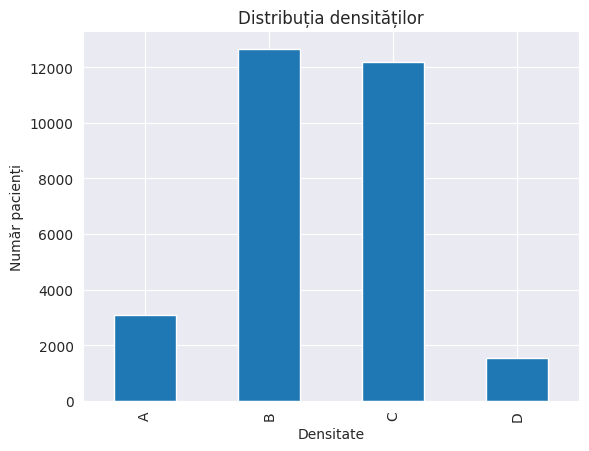

In [ ]:
df['density'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuția densităților')
plt.xlabel('Densitate')
plt.ylabel('Număr pacienți')
plt.show()

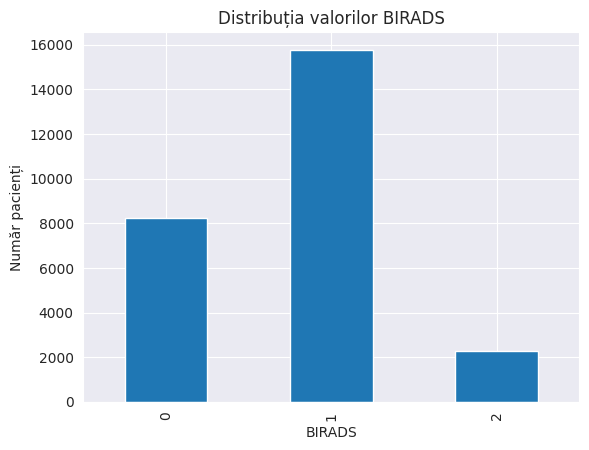

In [ ]:
from matplotlib.ticker import FormatStrFormatter

ax = df['BIRADS'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuția valorilor BIRADS')
plt.xlabel('BIRADS')
plt.ylabel('Număr pacienți')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.show()

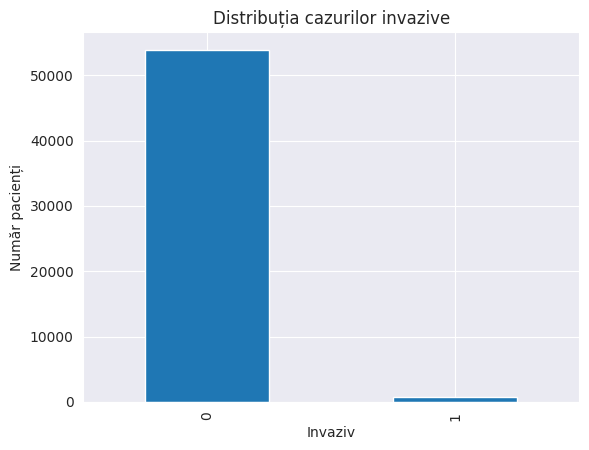

In [ ]:
df['invasive'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuția cazurilor invazive')
plt.xlabel('Invaziv')
plt.ylabel('Număr pacienți')
plt.show()


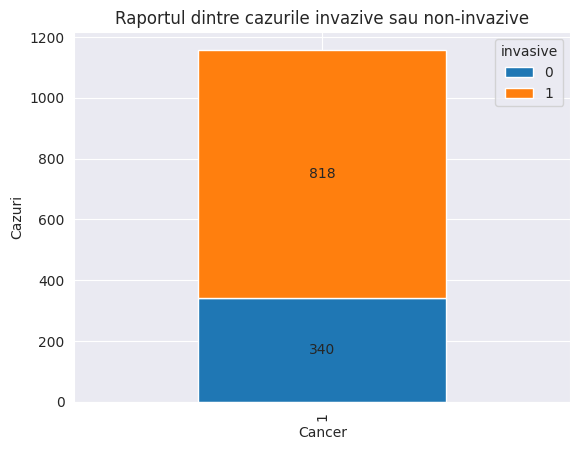

In [ ]:
# Filter the dataframe for positive cases of cancer
positive_df = df[df['cancer'] == 1]

# Create a grouped data frame based on 'cancer' and 'invasive' columns
grouped_df = positive_df.groupby(['cancer', 'invasive']).size().unstack()

# Create the stacked bar plot
ax = grouped_df.plot(kind='bar', stacked=True)
plt.title('Raportul dintre cazurile invazive sau non-invazive')
plt.xlabel('Cancer')
plt.ylabel('Cazuri')

# Add the annotation
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f}'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

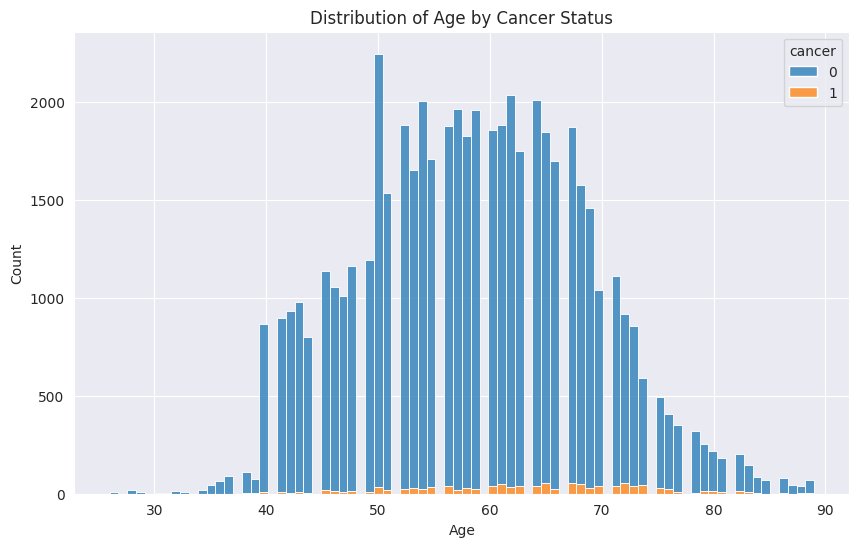

In [ ]:
import seaborn as sns

# Create a histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='cancer', multiple="stack")
plt.title('Distribution of Age by Cancer Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()